In [150]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

import tensorflow as tf
from tensorflow.keras import layers

import pandas as pd

In [151]:
def f(x):
    return np.sin(x)

def shift_scale(x):
    return np.pi / 2.0 * x

In [152]:
# Helper functions

# Display training progress by printing a single dot for each completed epoch
class print_dot(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 500 == 0: print('')
        if epoch % 10 == 0: print('.', end='')
        
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.semilogy(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
    plt.semilogy(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
    plt.legend()
    plt.ylim([1e-16,1e2]) 


def plot_layers(model):
    plt.figure(figsize=(10, 2), dpi=100)

    plt.subplots_adjust(wspace=0.3)

    # Histogram of layer parameters
    plt.subplot(1,4,1)
    weights = model.layers[0].get_weights()[0]
    plt.hist(weights[0,:]); plt.title('weights layer 0')

    plt.subplot(1,4,2)
    weights = model.layers[1].get_weights()[0]
    plt.hist(weights[0,:]); plt.title('weights layer 1')

    plt.subplot(1,4,3)
    biases = model.layers[0].get_weights()[1]
    plt.hist(biases); plt.title('biases layer 0');

    plt.subplot(1,4,4)
    biases = model.layers[1].get_weights()[1]
    plt.hist(biases); plt.title('biases layer 1')
    
def plot_prediction(data,fun,model):
    result = model.predict(data)
    plt.plot(data, fun, 's', label='data')
    plt.plot(data, result, 'o', label='DNN')
    plt.plot(data, f(shift_scale(data)), '+', label='f(x)')
    plt.legend()

    data_curve = np.linspace(-1,1,512)
    result_curve = model.predict(data_curve)

    plt.figure()
    plt.plot(data_curve, result_curve, label='DNN')
    plt.plot(data_curve, f(shift_scale(data_curve)), label='f(x)')
    plt.legend();
    
def unit_noise(size):
    return 2.0 * ( np.random.random(size) - 0.5 )

In [153]:
# Training set and validation sets

n_train = 512; # Size of training set
n_val = 256;   # Size of validation set

noise_magnitude = 0.2 # Magnitude of noise added to training and validation sets

data = np.linspace(-1,1,n_train)
fun = f(shift_scale(data)) + noise_magnitude * unit_noise(data.size)

val_data = np.linspace(-1,1,n_val)
val_fun = f(shift_scale(val_data)) + noise_magnitude * unit_noise(val_data.size)

# Optimizer
optim = tf.keras.optimizers.RMSprop(lr=0.01)
# SGD(lr=0.01)

# Activation function
activ_fun = tf.keras.activations.relu;

# Number of nodes in each layer
n_node = 8

# Batch size
b_size = 8

# Number of epochs to train
n_epoch = 50

# Initializers

# Matrix initializer
k_init = tf.keras.initializers.RandomUniform(minval=-2, maxval=2)

# Bias initializer
b_init = tf.keras.initializers.RandomUniform(minval=-2, maxval=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             (None, 8)                 16        
_________________________________________________________________
dense_100 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_101 (Dense)            (None, 1)                 9         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________

.....
    val_loss  val_mean_squared_error      loss  mean_squared_error  epoch
45  0.016647                0.016647  0.016180            0.016180     45
46  0.013500                0.013500  0.016427            0.016427     46
47  0.013607                0.013607  0.016545            0.016545     47
48  0.017489                0.017489  0.016374            0.016374     48
49  0.019509                0.019

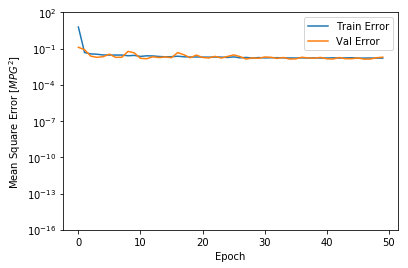

<Figure size 432x288 with 0 Axes>

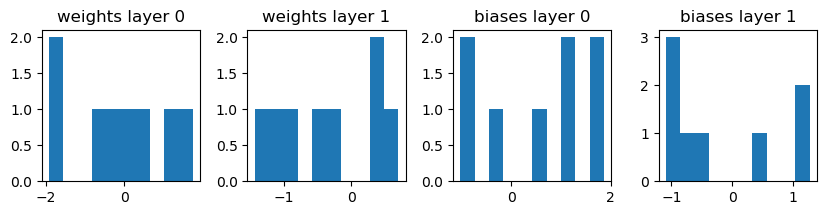

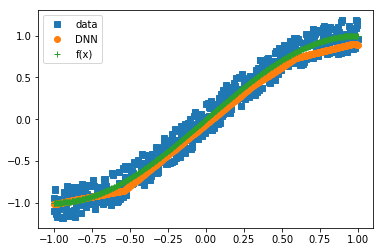

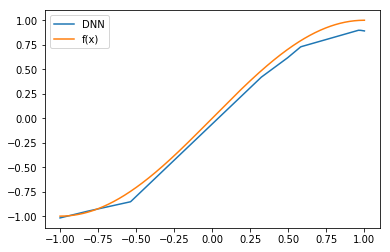

In [154]:
model = tf.keras.Sequential()

# Densely-connected layer
model.add(layers.Dense(n_node, activation=activ_fun, input_shape=(1,),
                       kernel_initializer=k_init, bias_initializer=b_init))
# Add another
model.add(layers.Dense(n_node, activation=activ_fun,
                       kernel_initializer=k_init, bias_initializer=b_init))
# 1 output unit
model.add(layers.Dense(1, kernel_initializer=k_init, bias_initializer=b_init))

# Overfitting case
model.compile(optimizer=optim, loss='mse', metrics=['mse'])

model.summary()

history = model.fit(data, fun, epochs=n_epoch, validation_data=(val_data, val_fun),
                    batch_size=b_size, verbose = 0, callbacks=[print_dot()])

hist = pd.DataFrame(history.history); hist['epoch'] = history.epoch

print(''); print(hist.tail())

# Convergence history
plot_history(history)

# Histogram of layer parameters
plt.figure()
plot_layers(model)

# Prediction
plt.figure()
plot_prediction(data,fun,model);

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_102 (Dense)            (None, 8)                 16        
_________________________________________________________________
dense_103 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_104 (Dense)            (None, 1)                 9         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________

.....
    val_loss  val_mean_squared_error      loss  mean_squared_error  epoch
45  0.198278                0.198278  0.215055            0.215055     45
46  0.183897                0.183897  0.199563            0.199563     46
47  0.170455                0.170455  0.185072            0.185072     47
48  0.157888                0.157888  0.171518            0.171518     48
49  0.146172                0.146

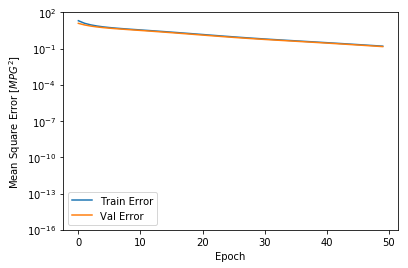

<Figure size 432x288 with 0 Axes>

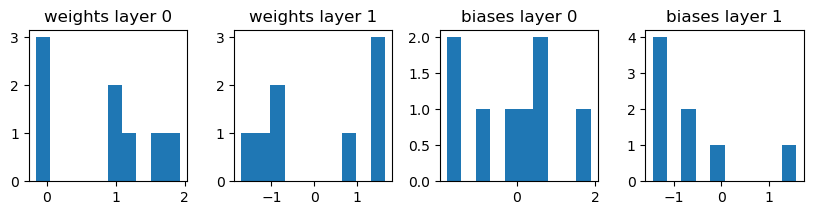

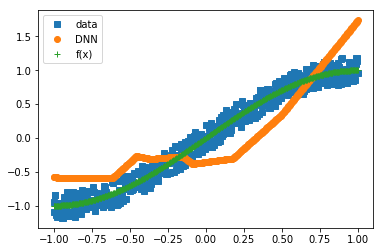

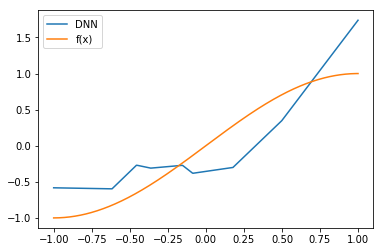

In [155]:
model = tf.keras.Sequential()

# Densely-connected layer
model.add(layers.Dense(n_node, activation=activ_fun, input_shape=(1,),
                       kernel_initializer=k_init, bias_initializer=b_init))
# Add another
model.add(layers.Dense(n_node, activation=activ_fun,
                       kernel_initializer=k_init, bias_initializer=b_init))
# 1 output unit
model.add(layers.Dense(1, kernel_initializer=k_init, bias_initializer=b_init))

# Overfitting case
model.compile(optimizer=optim, loss='mse', metrics=['mse'])

model.summary()

history = model.fit(data, fun, epochs=n_epoch, validation_data=(val_data, val_fun),
                    batch_size=data.size, verbose = 0, callbacks=[print_dot()])

hist = pd.DataFrame(history.history); hist['epoch'] = history.epoch

print(''); print(hist.tail())

# Convergence history
plot_history(history)

# Histogram of layer parameters
plt.figure()
plot_layers(model)

# Prediction
plt.figure()
plot_prediction(data,fun,model);